In [1]:
#Import master_log
import pickle
from pathlib import Path
data_folder = Path('Z:\\Maxime Chevee\Maxime 3\Analysis\Analysis OptoTagged 20180411')
file_to_open = data_folder / "master_log_lite.pkl"
with open(file_to_open, 'rb') as f:
   master_log = pickle.load(f, encoding='latin1')

#Create Reaction_time Whisker Plots
#Categories: SomHit, SomFA, VisHit, VisFA
#Data columns from stim_onset & FirstLick, combine sessions
#Category filter (temp): Non-claustrum (Code: sub = ... & (master_log.Category == 'NOTClaustrum')])

#Create a dictionary: session corresponding to trial types - SomHit, SomFFA, VisHit, VisFA
import numpy as np
import pandas as pd
N_trial_types = ['SomHit','SomFA','VisHit','VisFA']  #List of needed trial types
mouse_uni = np.unique(master_log.mouse_name)  #List of unique mouse numbers
date_uni = np.unique(master_log.date)  #List of unique dates

#Sub-DataFrame for individual mouse & Dictionary for session and reaction times for needed trial types
session_sub = {}
for i in range(0, len(mouse_uni)):  #Loop through each mouse
    for j in range(0, len(date_uni)):  #For each mouse, loop through all unique dates
        #Create a temporary sub-dataFrame of one mouse and one date with neurons in the NOTClaustrum category (category filter because of incomplete dataFrame)
        sub = master_log[(master_log.mouse_name == mouse_uni[i][0]) & (master_log.date == date_uni[j][0]) & (master_log.Category == 'NOTClaustrum')]
        if (sub.empty == False):
            #Append trial-associated first licks of to the dictionary Session_sub
            session_sub[str(mouse_uni[i][0])+','+str(date_uni[j][0])] = [sub[(sub['Stim/Block/Response'] == N_trial_types[0]) & (sub.cluster_name == sub.cluster_name[sub.cluster_name.index[0]][0])].FirstLick,
                                                                         sub[(sub['Stim/Block/Response'] == N_trial_types[1]) & (sub.cluster_name == sub.cluster_name[sub.cluster_name.index[0]][0])].FirstLick,
                                                                         sub[(sub['Stim/Block/Response'] == N_trial_types[2]) & (sub.cluster_name == sub.cluster_name[sub.cluster_name.index[0]][0])].FirstLick,
                                                                         sub[(sub['Stim/Block/Response'] == N_trial_types[3]) & (sub.cluster_name == sub.cluster_name[sub.cluster_name.index[0]][0])].FirstLick]
#Individual lists of FirstLick values for each needed trial types
SomHit = []
SomFA = []
VisHit = []
VisFA = []
len_session_sub = len(session_sub)
for i in session_sub:  #Loop through each session to collect trial-specific first licks
    L1 = session_sub[i][0]
    for j in L1:
        SomHit.append(j)
    L2 = session_sub[i][1]
    for j in L2:
        SomFA.append(j)
    L3 = session_sub[i][2]
    for j in L3:
        VisHit.append(j)
    L4 = session_sub[i][3]
    for j in L4:
        VisFA.append(j)

#Create boxplots
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(9,6))
ax = fig.add_subplot(111)
bp = ax.boxplot([SomHit, VisHit, SomFA, VisFA], vert=False)
ax.set_yticklabels(['SomHit','VisHit','SomFA','VisFA'])
ax.set_title('Reaction Time of Hit & FA for Somatosensory and Visual Stimuli')

Text(0.5, 1.0, 'Reaction Time of Hit & FA for Somatosensory and Visual Stimuli')

In [52]:
#Boxplots for individual mouse

import numpy as np
import pandas as pd
N_trial_types = ['SomHit','SomFA','VisHit','VisFA']
mouse_uni = np.unique(master_log.mouse_name)
date_uni = np.unique(master_log.date)

#Sub-DataFrame for individual mouse & Dictionary for session and reaction times
#Temp filter: Category - Non-claustrum
session_mouse = {}
for i in range(0, len(mouse_uni)):
    for j in range(0, len(date_uni)):
        sub = master_log[(master_log.mouse_name == mouse_uni[i][0]) & (master_log.date == date_uni[j][0]) & (master_log.Category == 'NOTClaustrum')]
        if (sub.empty == False):
            session_mouse[str(mouse_uni[i][0])+','+str(date_uni[j][0])] = [sub[(sub['Stim/Block/Response'] == N_trial_types[0]) & (sub.cluster_name == sub.cluster_name[sub.cluster_name.index[0]][0])].FirstLick,
                                                                           sub[(sub['Stim/Block/Response'] == N_trial_types[1]) & (sub.cluster_name == sub.cluster_name[sub.cluster_name.index[0]][0])].FirstLick,
                                                                           sub[(sub['Stim/Block/Response'] == N_trial_types[2]) & (sub.cluster_name == sub.cluster_name[sub.cluster_name.index[0]][0])].FirstLick,
                                                                           sub[(sub['Stim/Block/Response'] == N_trial_types[3]) & (sub.cluster_name == sub.cluster_name[sub.cluster_name.index[0]][0])].FirstLick]
    SomHit = []
    SomFA = []
    VisHit = []
    VisFA = []
    for value in session_mouse:
        L1 = session_mouse[value][0]
        for k in L1:
            SomHit.append(k)
        L2 = session_mouse[value][1]
        for k in L2:
            SomFA.append(k)
        L3 = session_mouse[value][2]
        for k in L3:
            VisHit.append(k)
        L4 = session_mouse[value][3]
        for k in L4:
            VisFA.append(k)
                
    #fig = plt.figure(figsize=(50,6))
    #fig.subplots_adjust(hspace=0.4, wspace=0.4)
    #ax = fig.add_subplot(1, len(mouse_uni), i+1)
    #ax.boxplot([SomHit, VisHit, SomFA, VisFA], vert=False)
    #ax.set_yticklabels(['SomHit','VisHit','SomFA','VisFA'])
    #ax.set_title(str(mouse_uni[i][0])+': Reaction Time of Hit & FA for Somatosensory and Visual Stimuli')

In [2]:
#Import Updated DataFrame

#Part 1
import numpy as np
import pandas as pd
import scipy as sp
from scipy import signal
from scipy import stats
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import math
from sklearn import metrics
#New DataFrame
from pathlib import Path
import pickle
data_folder = Path('C:\\Users\Brown Lab\Desktop\Analysis working folder\Claustrum explore')
#Part 2
file_to_open = data_folder / "Master_log_OptoSameTT_LITEpart1a.pkl"
with open(file_to_open, 'rb') as f:
   master1a = pickle.load(f, encoding='latin1')
file_to_open = data_folder / "Master_log_OptoSameTT_LITEpart1b.pkl"
with open(file_to_open, 'rb') as f:
   master1b = pickle.load(f, encoding='latin1')
file_to_open = data_folder / "Master_log_OptoSameTT_LITEpart1c.pkl"
with open(file_to_open, 'rb') as f:
   master1c = pickle.load(f, encoding='latin1')
file_to_open = data_folder / "Master_log_OptoSameTT_LITEpart1d.pkl"
with open(file_to_open, 'rb') as f:
   master1d = pickle.load(f, encoding='latin1')
#Part 3
file_to_open = data_folder / "Master_log_OptoSameTT_LITEpart2a.pkl"
with open(file_to_open, 'rb') as f:
   master2a = pickle.load(f, encoding='latin1')
file_to_open = data_folder / "Master_log_OptoSameTT_LITEpart2b.pkl"
with open(file_to_open, 'rb') as f:
   master2b = pickle.load(f, encoding='latin1')
file_to_open = data_folder / "Master_log_OptoSameTT_LITEpart2c.pkl"
with open(file_to_open, 'rb') as f:
   master2c = pickle.load(f, encoding='latin1')
#Part 4
file_to_open = data_folder / "Master_log_OptoSameTT_LITEpart3a.pkl"
with open(file_to_open, 'rb') as f:
   master3a = pickle.load(f, encoding='latin1')
file_to_open = data_folder / "Master_log_OptoSameTT_LITEpart3b.pkl"
with open(file_to_open, 'rb') as f:
   master3b = pickle.load(f, encoding='latin1')
file_to_open = data_folder / "Master_log_OptoSameTT_LITEpart3c.pkl"
with open(file_to_open, 'rb') as f:
   master3c = pickle.load(f, encoding='latin1')
file_to_open = data_folder / "Master_log_OptoSameTT_LITEpart3d.pkl"
with open(file_to_open, 'rb') as f:
   master3d = pickle.load(f, encoding='latin1')
#Part 5
master_log=pd.concat([master1a,master1b,master1c,master1d,master2a,master2b,master2c, master3a,master3b,master3c,master3d], axis=0)

C:\Users\Brown Lab\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\Brown Lab\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\Users\Brown Lab\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\Users\Brown Lab\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
C:\Users\Brown Lab\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1262: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


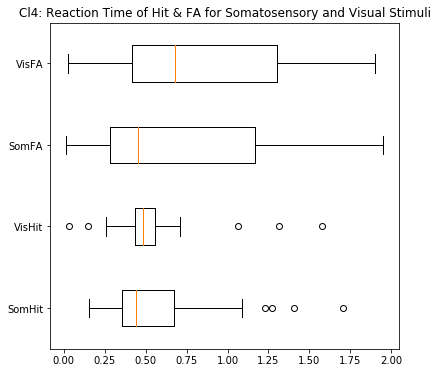

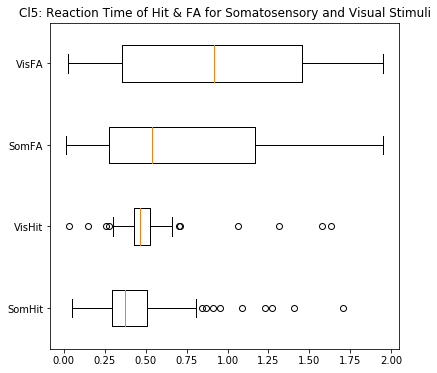

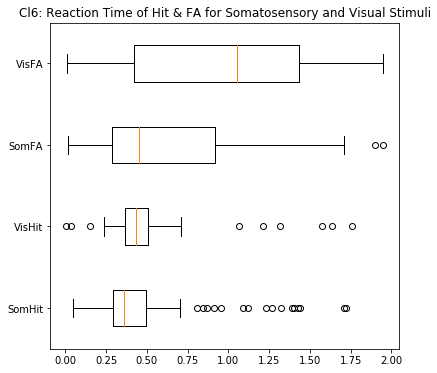

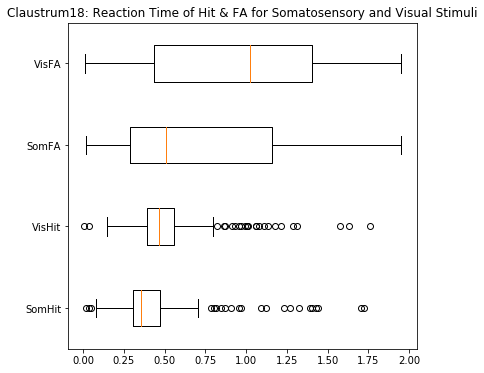

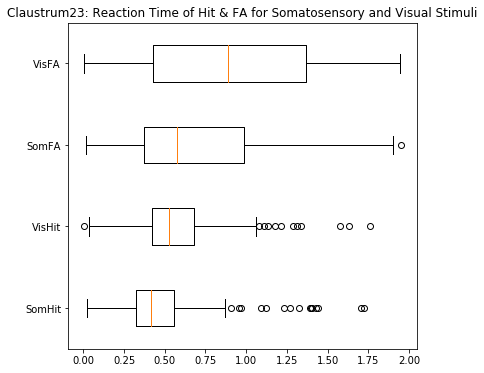

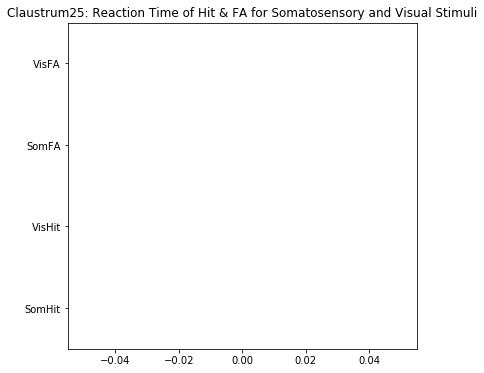

In [48]:
#Boxplots for individual mouse

import numpy as np
import pandas as pd
N_trial_types = ['SomHit','SomFA','VisHit','VisFA']
mouse_uni = np.unique(master_log.mouse_name)
date_uni = np.unique(master_log.date)

#Sub-DataFrame for individual mouse & Dictionary for session and reaction times
session_mouse = {}
for i in range(0, len(mouse_uni)):
    for j in range(0, len(date_uni)):
        sub = master_log[(master_log.mouse_name == mouse_uni[i][0]) & (master_log.date == date_uni[j][0])]
        if (sub.empty == False):
            session_mouse[str(mouse_uni[i][0])] = [sub[(sub['Stim/Block/Response'] == N_trial_types[0]) & (sub.cluster_name == sub.cluster_name[sub.cluster_name.index[0]][0])].FirstLick,
                                                                           sub[(sub['Stim/Block/Response'] == N_trial_types[1]) & (sub.cluster_name == sub.cluster_name[sub.cluster_name.index[0]][0])].FirstLick,
                                                                           sub[(sub['Stim/Block/Response'] == N_trial_types[2]) & (sub.cluster_name == sub.cluster_name[sub.cluster_name.index[0]][0])].FirstLick,
                                                                           sub[(sub['Stim/Block/Response'] == N_trial_types[3]) & (sub.cluster_name == sub.cluster_name[sub.cluster_name.index[0]][0])].FirstLick]
    SomHit = []
    SomFA = []
    VisHit = []
    VisFA = []
    for value in session_mouse:
        L1 = session_mouse[value][0]
        for k in L1:
            SomHit.append(k)
        L2 = session_mouse[value][1]
        for k in L2:
            SomFA.append(k)
        L3 = session_mouse[value][2]
        for k in L3:
            VisHit.append(k)
        L4 = session_mouse[value][3]
        for k in L4:
            VisFA.append(k)
                
    fig = plt.figure(figsize=(50,6))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    ax = fig.add_subplot(1, len(mouse_uni), i+1)
    ax.boxplot([SomHit, VisHit, SomFA, VisFA], vert=False)
    ax.set_yticklabels(['SomHit','VisHit','SomFA','VisFA'])
    ax.set_title(str(mouse_uni[i][0])+': Reaction Time of Hit & FA for Somatosensory and Visual Stimuli')

In [50]:
for i in session_mouse:
    if i == 'Claustrum25':
        print(session_mouse[i])

[392706    NaN
392730    NaN
392754    NaN
392778    NaN
392790    NaN
392802    NaN
392814    NaN
392826    NaN
392850    NaN
392886    NaN
392898    NaN
392934    NaN
392970    NaN
393030    NaN
393042    NaN
393054    NaN
393066    NaN
393090    NaN
393150    NaN
393162    NaN
393174    NaN
393186    NaN
393222    NaN
393234    NaN
393258    NaN
393270    NaN
393282    NaN
393294    NaN
393318    NaN
393354    NaN
         ... 
395466    NaN
395478    NaN
395490    NaN
395502    NaN
395526    NaN
396666    NaN
396678    NaN
396690    NaN
396714    NaN
396738    NaN
396762    NaN
396798    NaN
396834    NaN
396894    NaN
396942    NaN
396954    NaN
397050    NaN
397062    NaN
397074    NaN
397110    NaN
397134    NaN
397146    NaN
397206    NaN
397218    NaN
397254    NaN
397278    NaN
397302    NaN
397314    NaN
397422    NaN
397470    NaN
Name: FirstLick, Length: 101, dtype: object, 393018    NaN
393138    NaN
393306    NaN
393330    NaN
393342    NaN
393438    NaN
393450    NaN
39